In [76]:
import os, sys

import matplotlib.pyplot as plt
plt.style.use(['science','ieee', "no-latex", "std-colors"])

In [77]:
tests_path = "tests"
test_system = "fbuta"

def read_slurm_output(filename):
    f = open(filename)
    lines = f.readlines()
    errors = [float(line.split()[-1]) for line in lines if line.__contains__("Error")]
    return errors
        



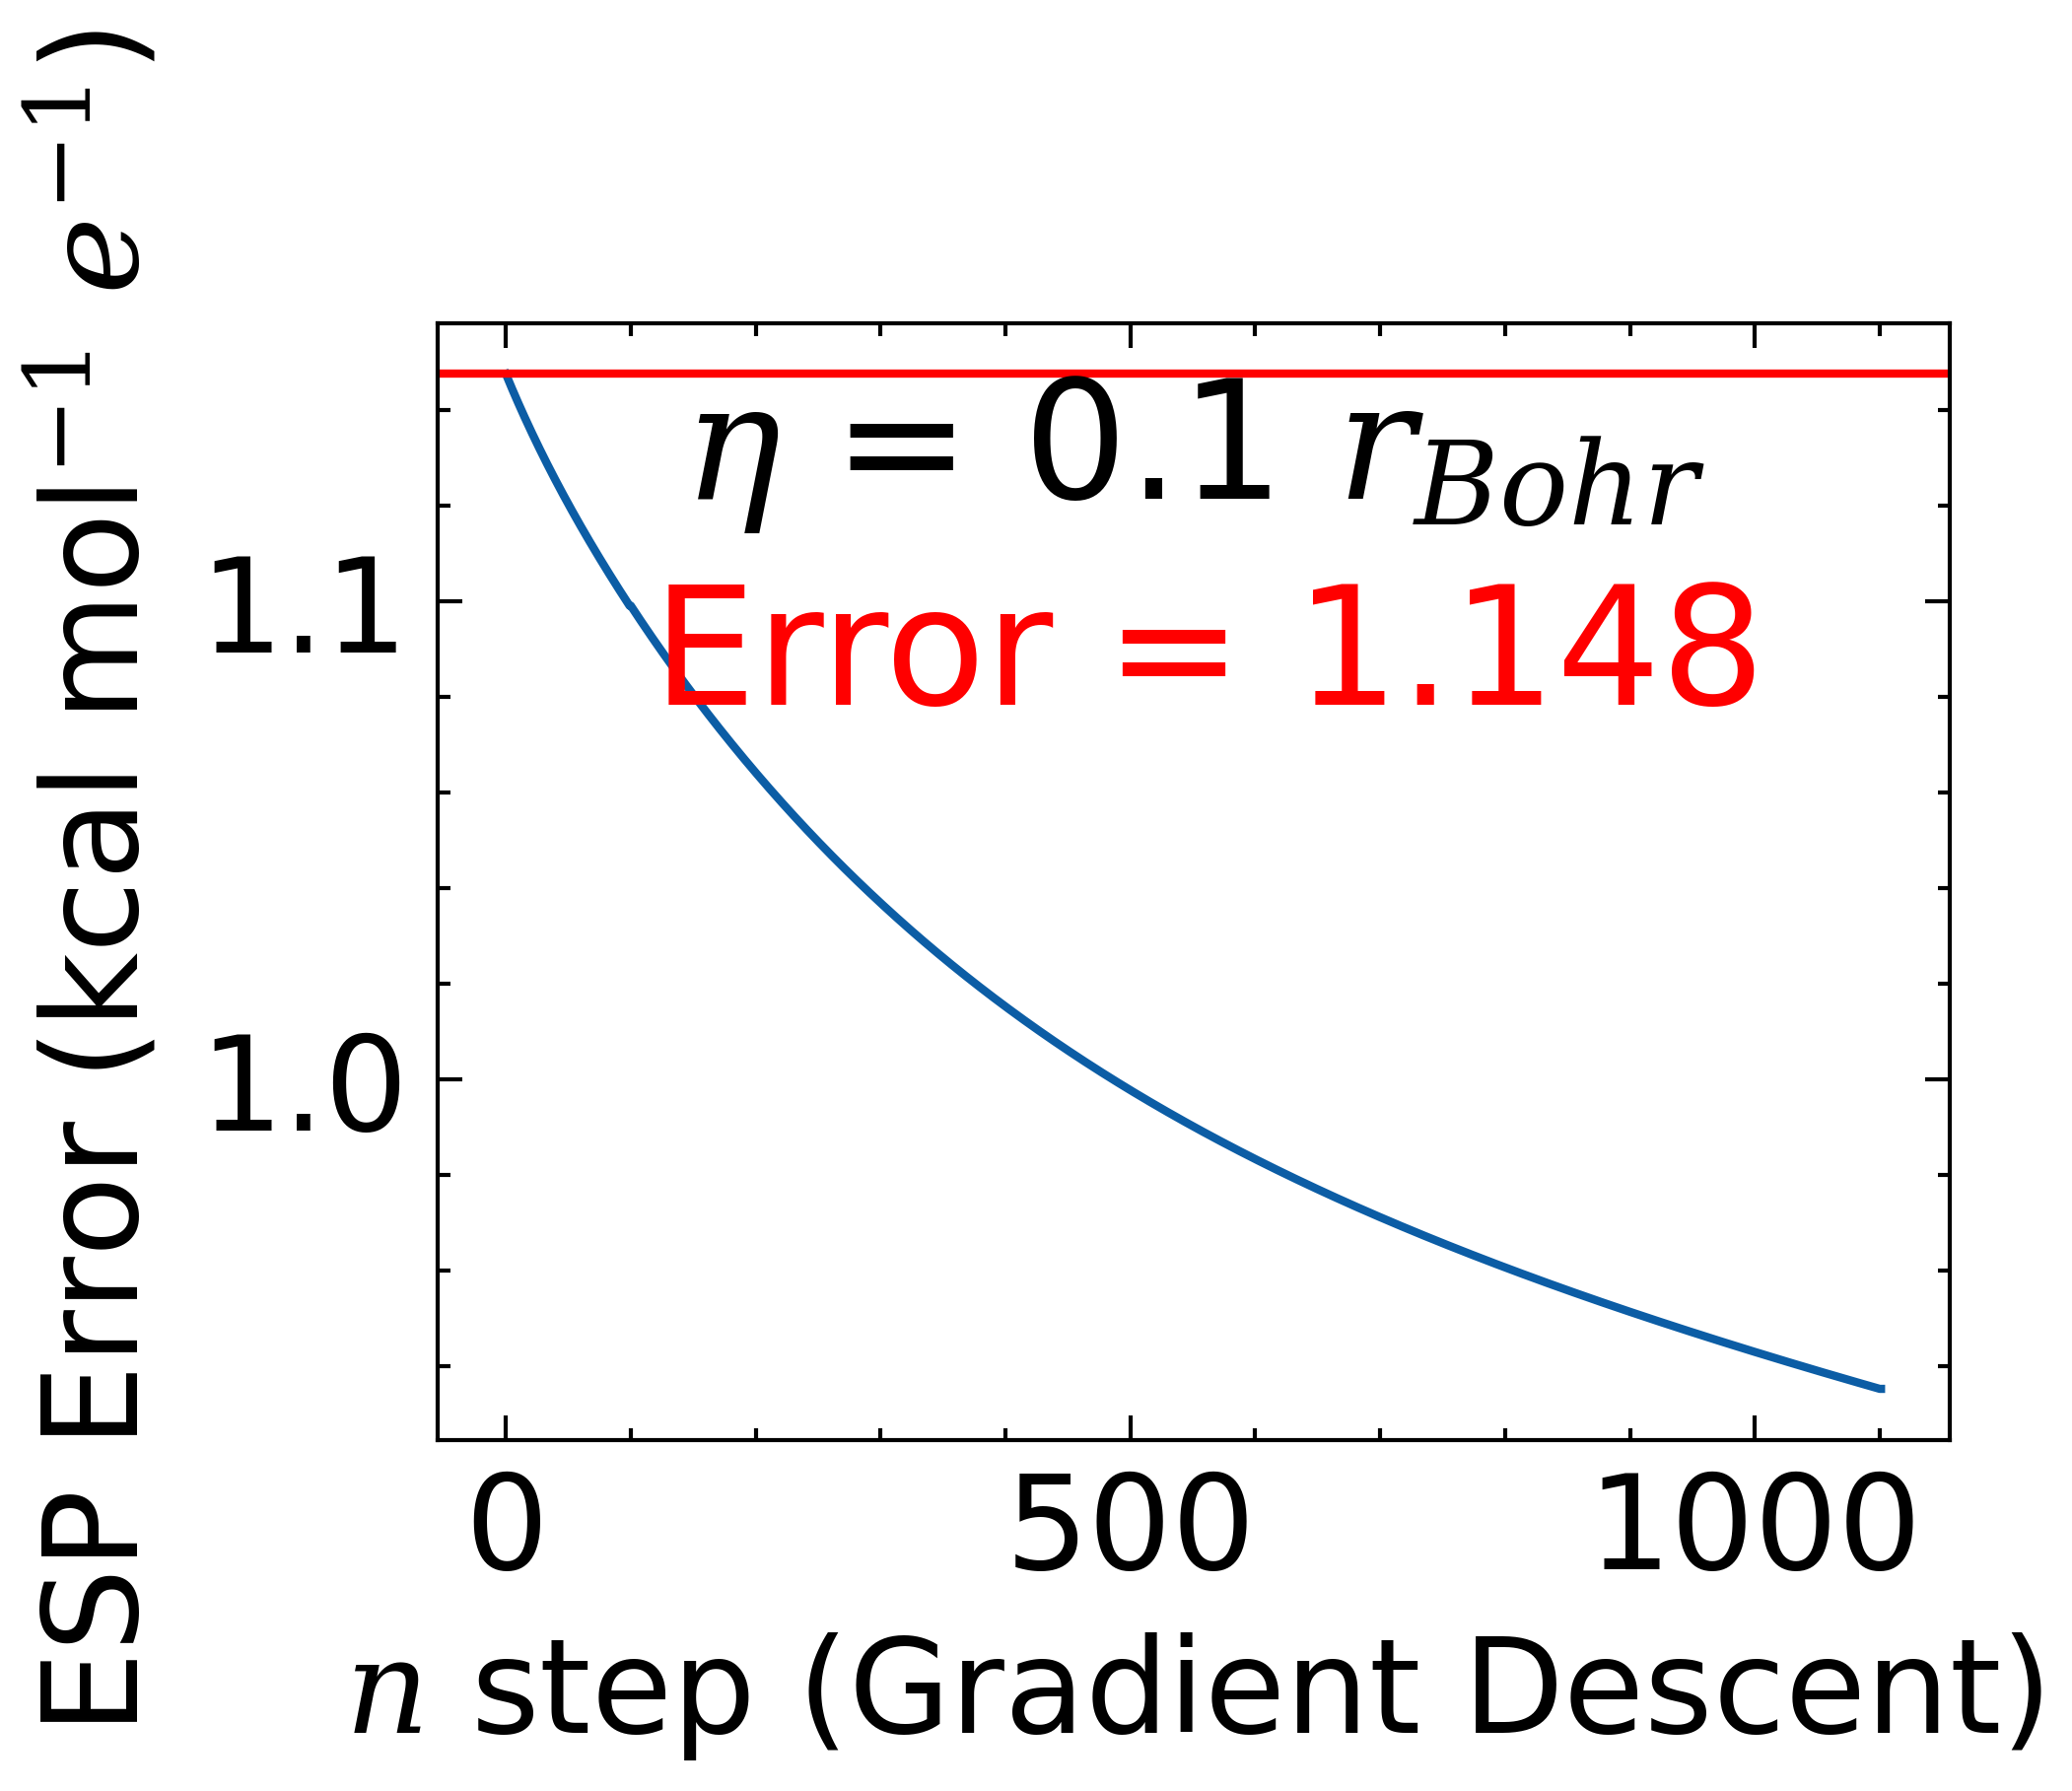

In [78]:
path1 = "fbuta/1_2/slurm-38293402.out"
errors1 = read_slurm_output(path1)
path2 = "fbuta/1_2/slurm-38293419.out"
errors2 = read_slurm_output(path2)
errors = errors1 + errors2

plt.plot(range(len(errors)), errors)
plt.xlabel("$n$ step (Gradient Descent)")
plt.ylabel("ESP Error (kcal mol$^{-1}$ $e^{-1}$)")
ax=plt.gca()
plt.text(0.5, 0.8, '$ \eta $ = 0.1 $r_{Bohr}$ \n', horizontalalignment='center', 
     verticalalignment='center', transform=ax.transAxes, fontsize=20)


plt.text(0.51, 0.7, 'Error = {:.3f}'.format(errors[0]), horizontalalignment='center', 
     verticalalignment='center', transform=ax.transAxes, fontsize=20, color="r")

plt.axhline(errors[0], color="r")

plt.savefig("figs/Initial.pdf", bbox_inches="tight")


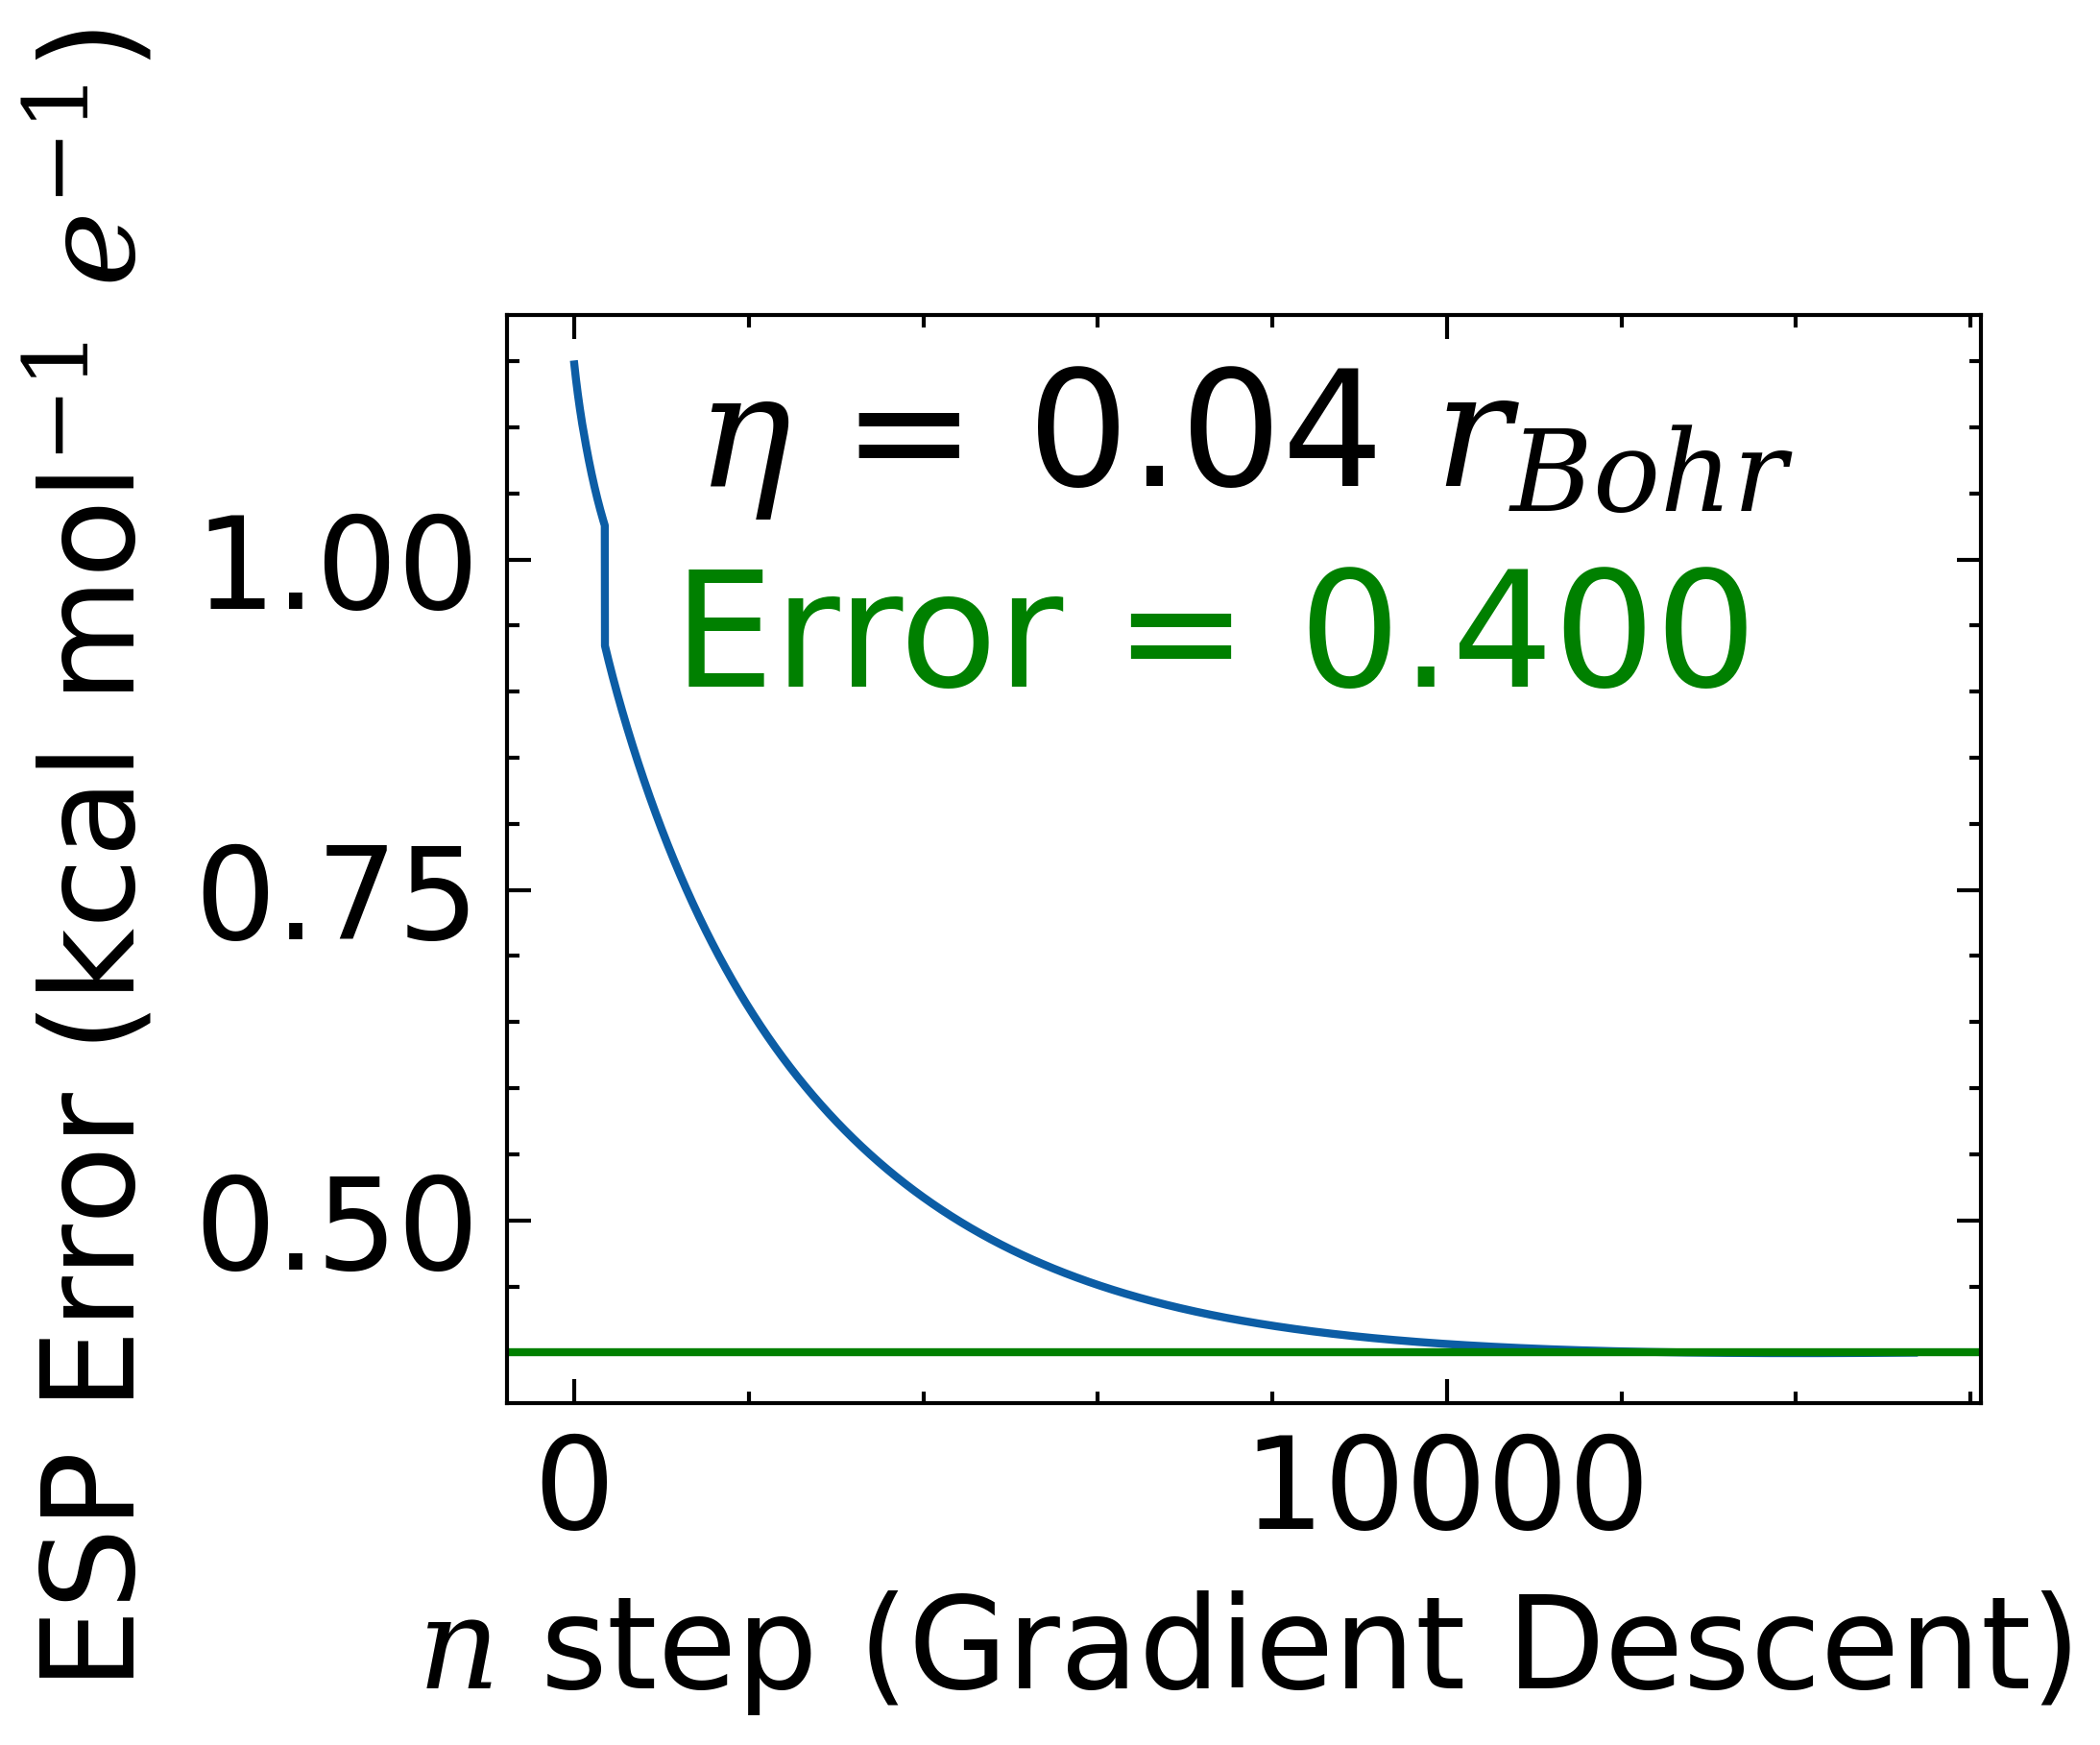

In [79]:
path = "fbuta/1_2.4"
slurm_outputs = [int(x[6:14]) for x in os.listdir(path) if x.__contains__("slurm-")]
slurm_outputs.sort()

errors = []

for s in slurm_outputs:
    errors1 = read_slurm_output(path+"/slurm-{}.out".format(s))
    errors += errors1
    
plt.plot(range(len(errors)), errors)
plt.xlabel("$n$ step (Gradient Descent)")
plt.ylabel("ESP Error (kcal mol$^{-1}$ $e^{-1}$)")
ax=plt.gca()
plt.text(0.5, 0.8, '$ \eta $ = 0.04 $r_{Bohr}$ \n', horizontalalignment='center', 
     verticalalignment='center', transform=ax.transAxes, fontsize=20)
plt.text(0.48, 0.7, 'Error = {:.3f}'.format(errors[-1]), horizontalalignment='center', 
     verticalalignment='center', transform=ax.transAxes, fontsize=20, color="g")

plt.axhline(errors[-1], color="g")

plt.savefig("figs/working.pdf", bbox_inches="tight")



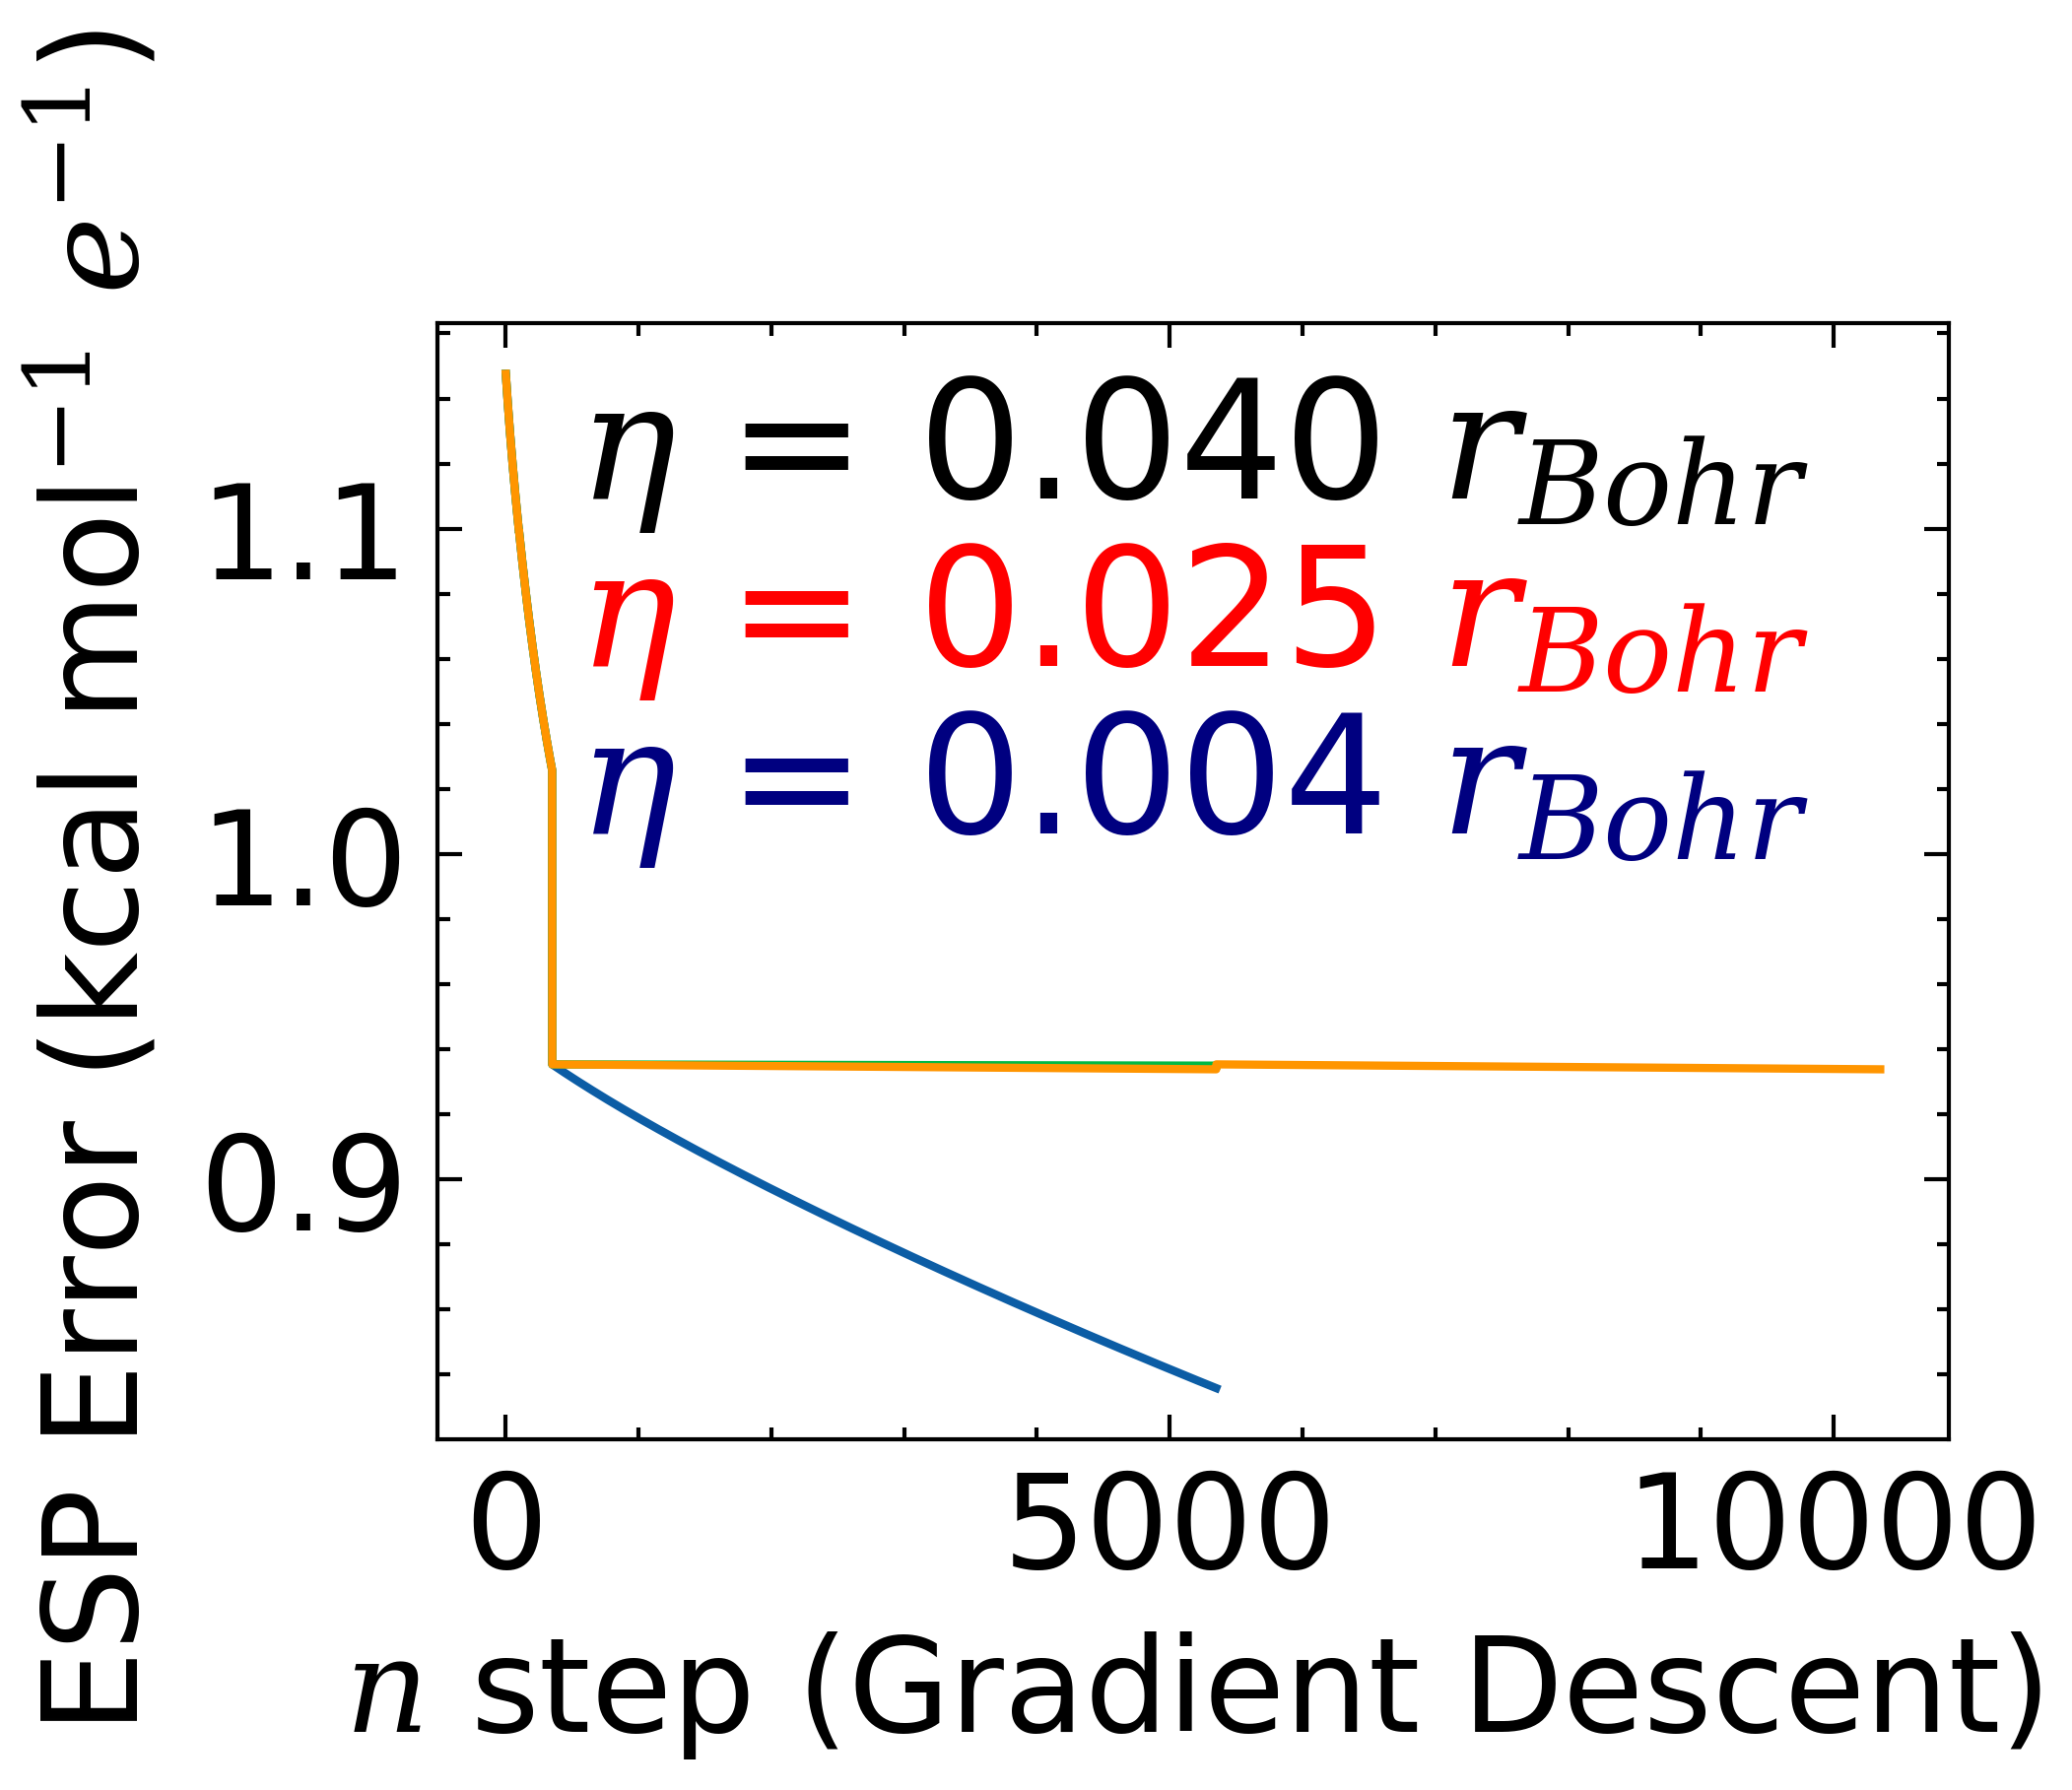

In [80]:
path = "fbuta/1_2.5"
slurm_outputs = [int(x[6:14]) for x in os.listdir(path) if x.__contains__("slurm-")]
slurm_outputs.sort()
errors_8 = []
for s in slurm_outputs:
    errors1 = read_slurm_output(path+"/slurm-{}.out".format(s))
    errors_8 += errors1
    
path = "fbuta/1_2.7"
slurm_outputs = [int(x[6:14]) for x in os.listdir(path) if x.__contains__("slurm-")]
slurm_outputs.sort()
errors_7 = []
for s in slurm_outputs:
    errors1 = read_slurm_output(path+"/slurm-{}.out".format(s))
    errors_7 += errors1
    
path = "fbuta/1_2.3"
slurm_outputs = [int(x[6:14]) for x in os.listdir(path) if x.__contains__("slurm-")]
slurm_outputs.sort()
errors_3 = []
for s in slurm_outputs:
    errors1 = read_slurm_output(path+"/slurm-{}.out".format(s))
    errors_3 += errors1
    
plt.plot(range(len(errors_7)), errors_7)
plt.plot(range(len(errors_8)), errors_8)
plt.plot(range(len(errors_3)), errors_3)
plt.xlabel("$n$ step (Gradient Descent)")
plt.ylabel("ESP Error (kcal mol$^{-1}$ $e^{-1}$)")
ax=plt.gca()

plt.text(0.5, 0.8, '$ \eta $ = 0.040 $r_{Bohr}$ \n', horizontalalignment='center', 
     verticalalignment='center', transform=ax.transAxes, fontsize=20)

plt.text(0.5, 0.65, '$ \eta $ = 0.025 $r_{Bohr}$ \n', horizontalalignment='center', 
     verticalalignment='center', transform=ax.transAxes, fontsize=20, color="red")

plt.text(0.5, 0.5, '$ \eta $ = 0.004 $r_{Bohr}$ \n', horizontalalignment='center', 
     verticalalignment='center', transform=ax.transAxes, fontsize=20, color="Navy")

plt.savefig("figs/testing_01.pdf", bbox_inches="tight")


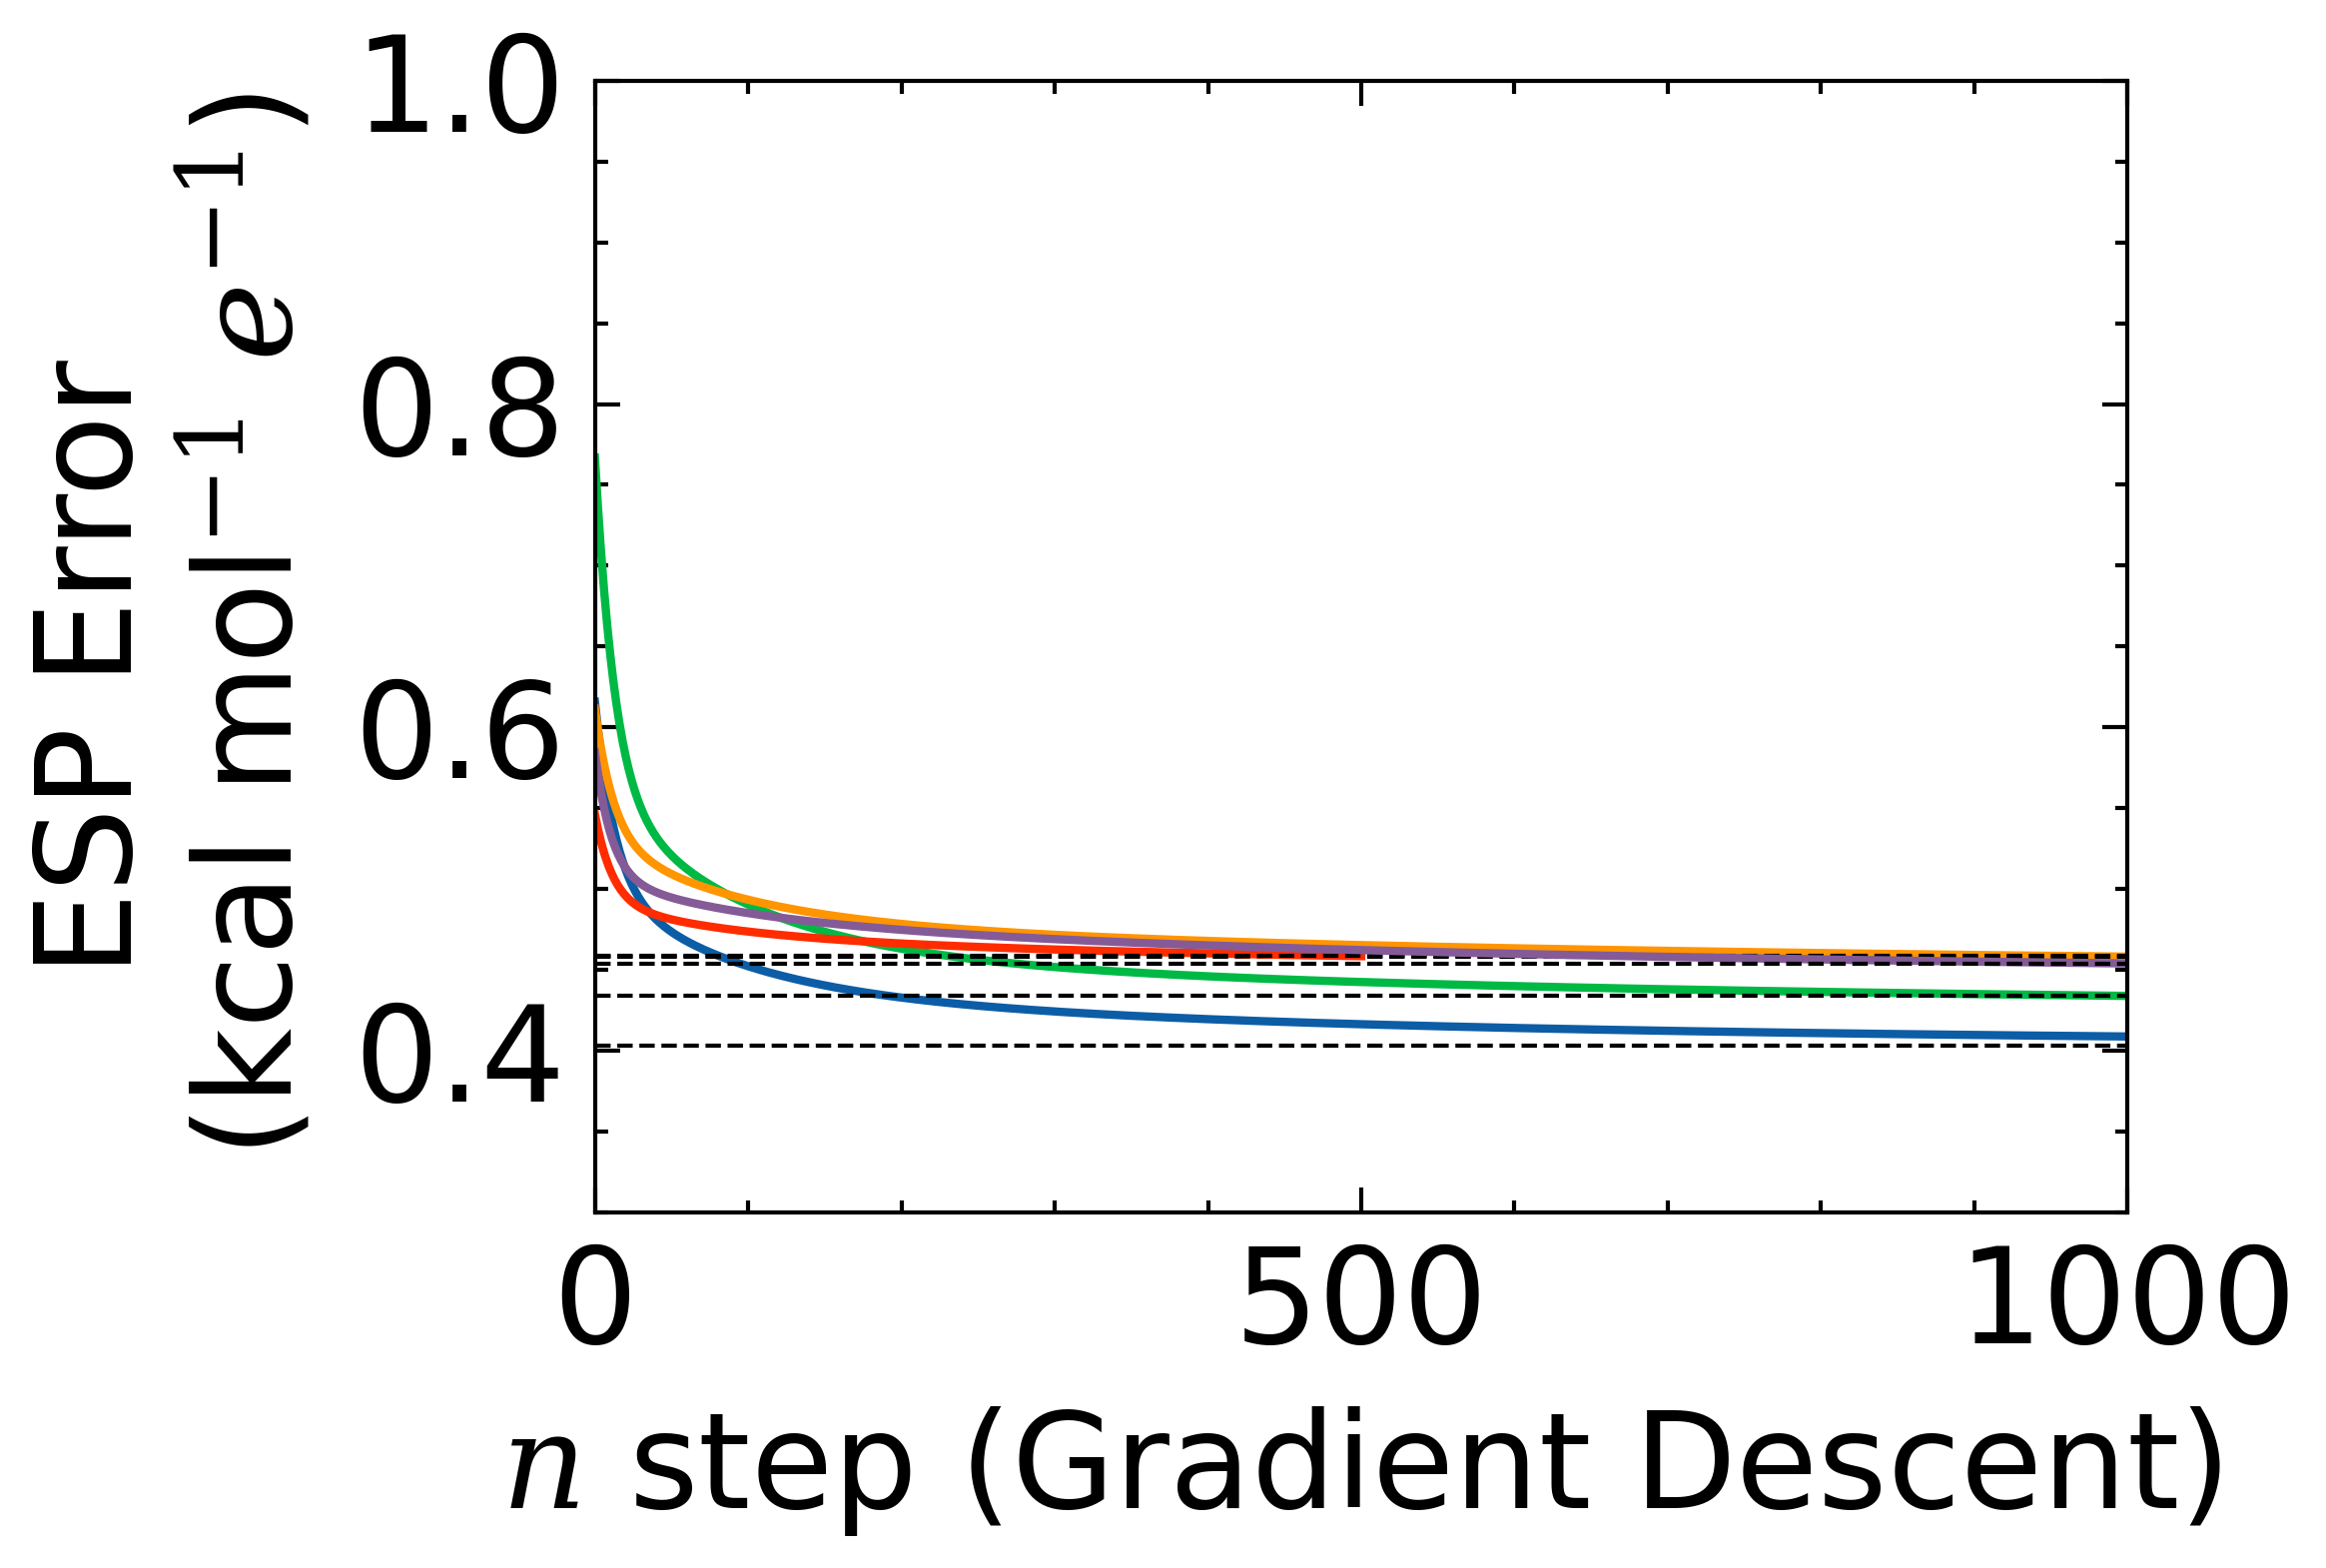

In [83]:
def GD_plot(path):
    slurm_outputs = [int(x[6:14]) for x in os.listdir(path) if x.__contains__("slurm-")]
    slurm_outputs.sort()

    errors = []

    for s in slurm_outputs:
        errors1 = read_slurm_output(path+"/slurm-{}.out".format(s))
        errors += errors1

    plt.plot(range(len(errors)), errors, label=path[-1])
    plt.xlabel("$n$ step (Gradient Descent)")
    plt.ylabel("ESP Error \n (kcal mol$^{-1}$ $e^{-1}$)")
    ax=plt.gca()
#     plt.text(0.5, 0.8, '$ \eta $ = 0.04 $r_{Bohr}$ \n', horizontalalignment='center', 
#          verticalalignment='center', transform=ax.transAxes, fontsize=20)
#     plt.text(0.48, 0.7, 'Error = {:.3f}'.format(errors[-1]), horizontalalignment='center', 
#          verticalalignment='center', transform=ax.transAxes, fontsize=20, color="g")

    plt.axhline(errors[-1], color="k", linestyle="dashed", lw=0.5)


#     plt.show()
    
GD_plot("fbuta/2_3")
GD_plot("fbuta/3_4")
GD_plot("fbuta/4_5")
GD_plot("fbuta/5_6")
GD_plot("fbuta/6_7")
plt.xlim(0,1000)
plt.ylim(0.3,1)

plt.savefig("figs/working.pdf", bbox_inches="tight")
